# coffee

### get data from kaggel

In [19]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("divu2001/coffee-shop-sales-analysis")

# print("Path to dataset files:", path)

### Make DF

In [20]:
import pandas as df
main_DF = df.read_csv("Project.csv")
# DF.head()
main_DF.sample(5)

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
113829,82733,03-05-2023,11:17:17,8,Hell's Kitchen,61,2,4.75,9.5,Drinking Chocolate,Hot chocolate,Sustainably Grown Organic,Large,May,Wednesday,11,5,2
68588,51601,26-03-2023,14:43:17,8,Hell's Kitchen,10,1,10.00,10.0,Coffee beans,Green beans,Guatemalan Sustainably Grown,Not Defined,March,Sunday,14,3,6
72821,68213,16-04-2023,10:45:36,5,Lower Manhattan,55,1,4.00,4.0,Tea,Brewed Chai tea,Morning Sunrise Chai,Large,April,Sunday,10,4,6
112320,87565,07-05-2023,17:15:30,8,Hell's Kitchen,60,2,3.75,7.5,Drinking Chocolate,Hot chocolate,Sustainably Grown Organic,Regular,May,Sunday,17,5,6
101342,2585,05-01-2023,16:08:39,3,Astoria,44,2,2.50,5.0,Tea,Brewed herbal tea,Peppermint,Regular,January,Thursday,16,1,3


### Get valuable information


In [21]:
DF = main_DF[["store_id", "product_id", "Size", "Month", "Day of Week", "Hour", "unit_price", "Total_Bill"]]
DF.sample(10)

,store_id,product_id,Size,Month,Day of Week,Hour,unit_price,Total_Bill
69919,5,1,Not Defined,6,1,15,18.00,18.00
15089,8,32,Regular,4,5,6,3.00,3.00
26734,5,50,Regular,6,3,9,2.50,2.50
135238,8,28,Small,6,0,17,2.00,4.00
137618,8,31,Small,6,4,9,2.20,4.40
87516,5,55,Large,5,4,14,4.00,8.00
39792,5,40,Not Defined,4,4,13,3.75,3.75
144223,5,24,Large,3,1,10,3.00,6.00
2467,8,43,Large,3,6,11,3.00,3.00
120389,3,35,Regular,4,0,13,3.10,6.20


##### Chang size to int

In [22]:
DF["Size"] = DF["Size"].replace("Large",3)
DF["Size"] = DF["Size"].replace("Regular",2)
DF["Size"] = DF["Size"].replace("Small",1)
DF["Size"] = DF["Size"].replace("Not Defined",0)


DF['unit_price'] = DF['unit_price'].astype(int)

C:\Users\Mr_shotgun\AppData\Local\Temp\ipykernel_2560\3861409673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF["Size"] = DF["Size"].replace("Large",3)
C:\Users\Mr_shotgun\AppData\Local\Temp\ipykernel_2560\3861409673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF["Size"] = DF["Size"].replace("Regular",2)
C:\Users\Mr_shotgun\AppData\Local\Temp\ipykernel_2560\3861409673.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

<Axes: >

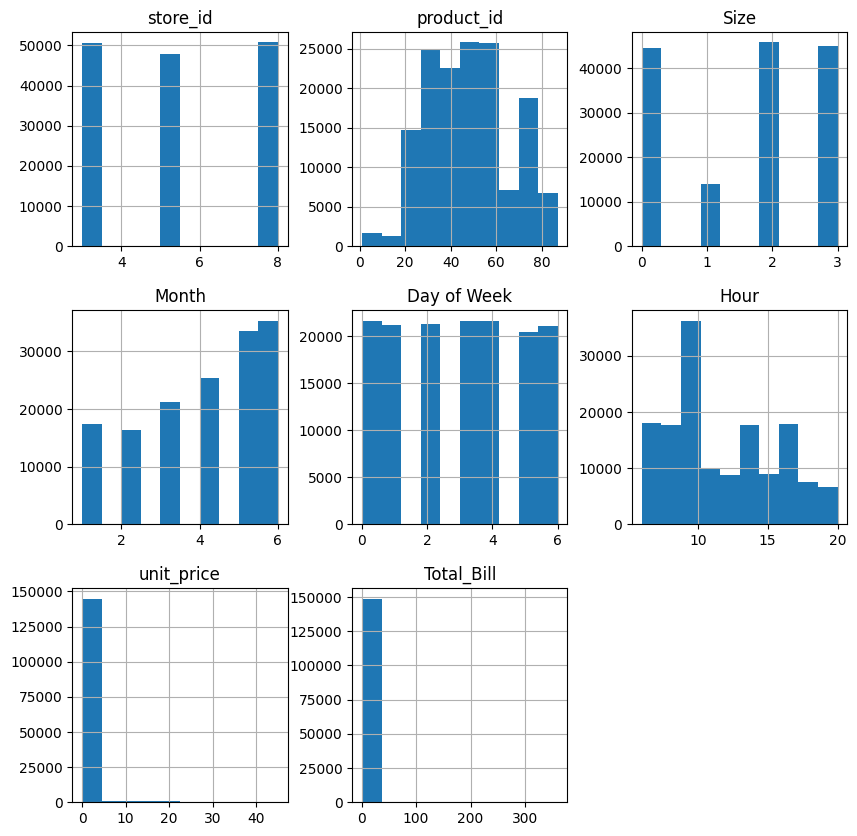

In [23]:
DF.describe()
DF.hist(figsize=(10,10))
DF.boxplot(figsize=(10,10))

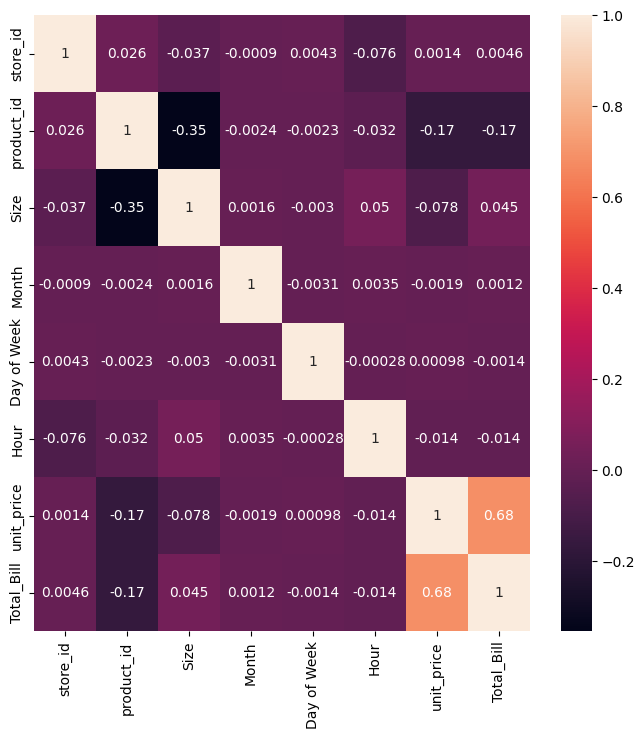

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = DF.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

### make and split x and y:

In [25]:
from sklearn.model_selection import train_test_split

x = DF[['Month', 'Day of Week', 'Hour']]
y = DF[['unit_price']]
x_train, x_test, y_trean, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

### make and fit model:

In [26]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_trean)
pred = model.predict(x_test)

c:\Users\Mr_shotgun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### score:

In [27]:
from sklearn.metrics import accuracy_score, classification_report

print("accuracy_score: ", accuracy_score(y_true=y_test, y_pred=pred))
print(classification_report(y_true=y_test, y_pred=pred))

accuracy_score:  0.5234375
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1358
           2       0.00      0.00      0.00      8701
           3       0.52      1.00      0.69     15611
           4       0.00      0.00      0.00      3293
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00        31
           7       0.00      0.00      0.00        43
           8       0.00      0.00      0.00       160
           9       0.00      0.00      0.00        68
          10       0.00      0.00      0.00        50
          12       0.00      0.00      0.00        46
          13       0.00      0.00      0.00        33
          14       0.00      0.00      0.00        96
          15       0.00      0.00      0.00        32
          18       0.00      0.00      0.00        83
          19       0.00      0.00      0.00        28
          20       0.00      0.00      0.00        30


c:\Users\Mr_shotgun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mr_shotgun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mr_shotgun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

### plot score:

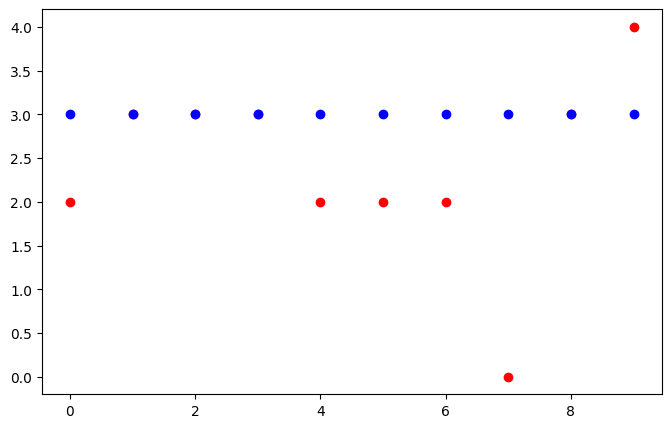

In [28]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,5))
plt.scatter(range(10), y_test[:10], color='red', marker='o', label='مقدار واقعی')
plt.scatter(range(10), pred[:10], color='blue', marker='o', label='مقدار واقعی')
plt.show()

### save data in exel

In [29]:
# DF.to_excel("DF.xlsx", engine='openpyxl')